
## 데이터셋 출처
* https://dacon.io/competitions/open/235538/data


### 데이터 구성
#### FIFA_train.csv / FIFA_test.csv
* id : 선수 고유의 아이디
* name : 이름
* age : 나이
* continent : 선수들의 국적이 포함되어 있는 대륙입니다
* contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
* position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
* prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
* reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
* stat_overall : 선수의 현재 능력치 입니다.
* stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
* stat_skill_moves : 선수의 개인기 능력치 입니다.
* value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다

#### submission.csv
* id : 선수 고유의 아이디
* value : 예측된 선수 이적 시장 가격을 기입 

## 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 데이터셋 로드

In [2]:
train = pd.read_csv('data/fifa/FIFA_train.csv')
test = pd.read_csv('data/fifa/FIFA_test.csv')
sub = pd.read_csv('data/fifa/submission.csv')
train.shape,test.shape,sub.shape

((8932, 12), (3828, 11), (3828, 2))

In [61]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [62]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [5]:
sub.head()

,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [3]:
# label 확인
set(train.columns) - set(test.columns)

{'value'}

## 전처리 작업

In [4]:
# 불필요한 컬럼 제거
train.drop(['id','name'], axis=1, inplace=True)
test.drop(['id','name'], axis=1, inplace=True)

In [9]:
# 'continent' 값 확인
train.continent.value_counts()

europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64

In [10]:
# 'continent' 컬럼 object 타입에서 category 타입으로 변환
# train['continent'] = train['continent'].astype('category').cat.codes
# test['continent'] = test['continent'].astype('category').cat.codes

In [16]:
# 'contract_until' 값 확인
train.contract_until.value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [17]:
# 'contract_until' 컬럼에서 계약 연도만 추출
def func(string:object) -> int:
    string = string[-4:]
    return int(string)

train['contract_until'] = train['contract_until'].apply(func)
test['contract_until'] = test['contract_until'].apply(func)

In [18]:
# 'position' 컬럼 값 확인
train.position.value_counts()

MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64

In [14]:
# 'position' 컬럼 object 타입에서 category 타입으로 변환
# train['position'] = train['position'].astype('category').cat.codes
# test['position'] = test['position'].astype('category').cat.codes

In [15]:
# 'prefer_foot' 컬럼 값 확인
train.prefer_foot.value_counts()

right    6837
left     2095
Name: prefer_foot, dtype: int64

In [16]:
# 'prefer_foot' 컬럼 object 타입에서 category 타입으로 변환
# train['prefer_foot'] = train['prefer_foot'].astype('category').cat.codes
# test['prefer_foot'] = test['prefer_foot'].astype('category').cat.codes

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   int8   
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   int8   
 4   prefer_foot       8932 non-null   int8   
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(4), int8(3)
memory usage: 514.8 KB


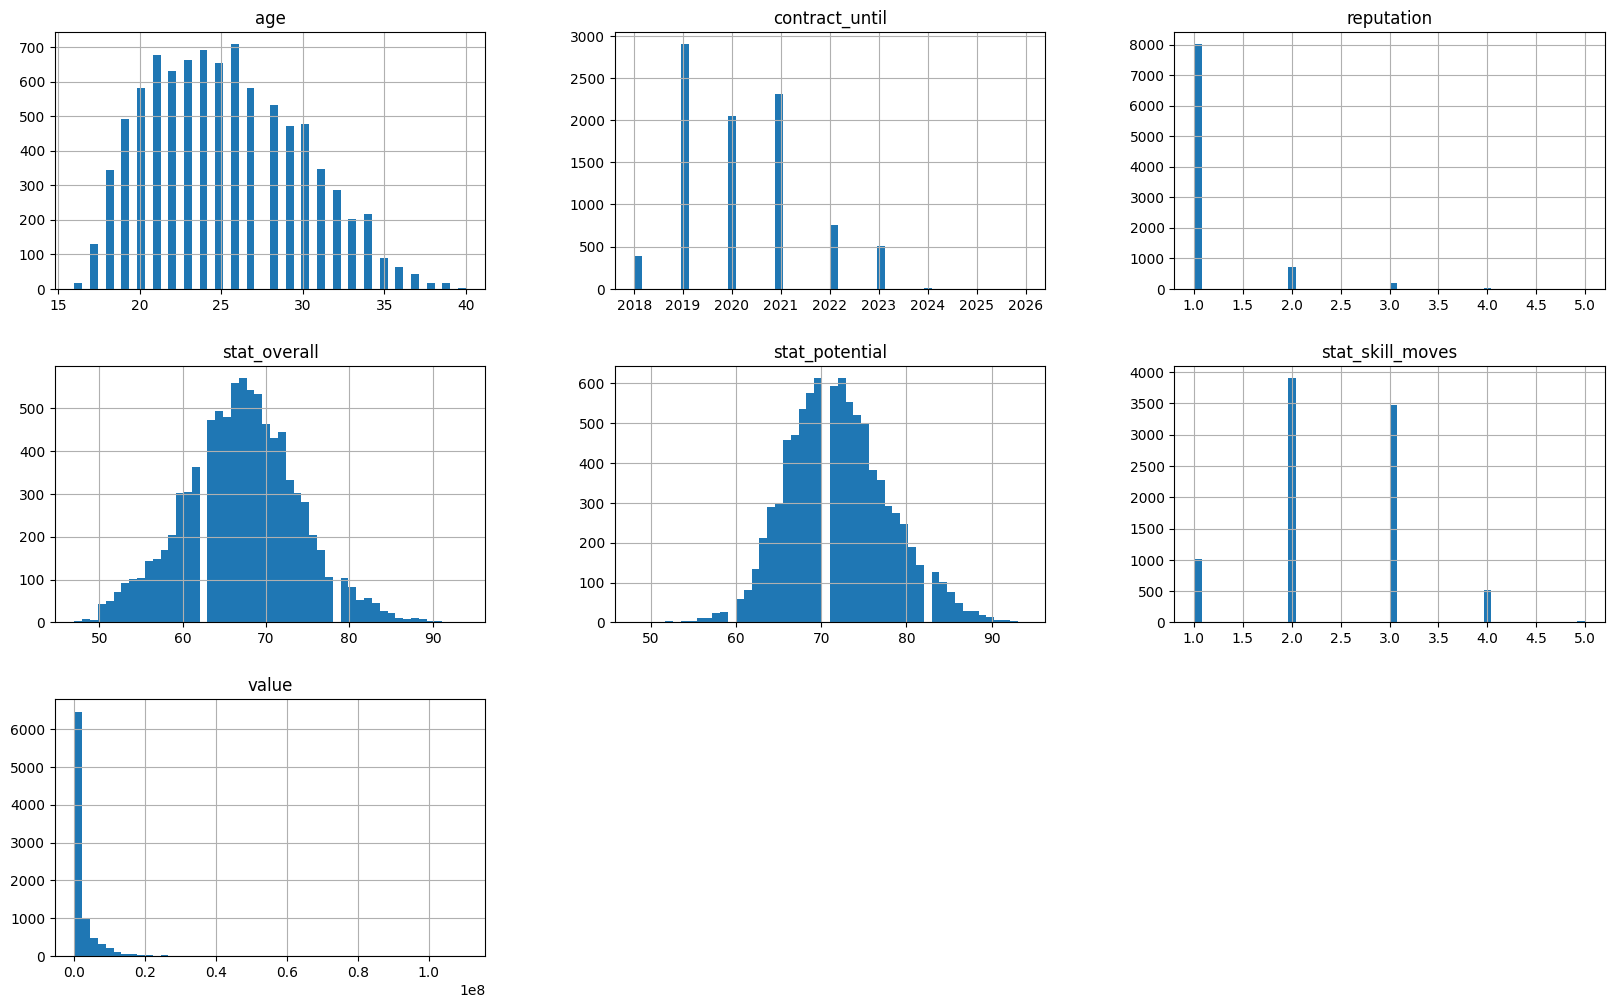

In [19]:
# 히스토그램 확인
train.hist(bins=50, figsize=(20,12));

<AxesSubplot: xlabel='value'>

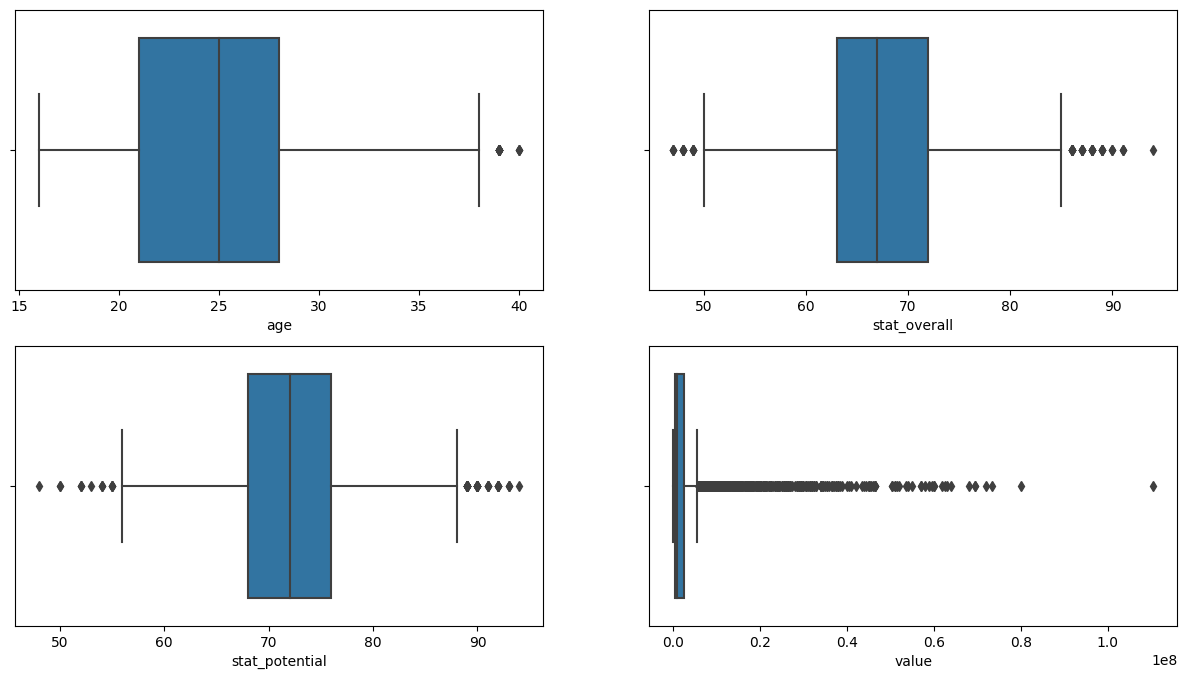

In [20]:
# 수치형 데이터 이상치 확인
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
sns.boxplot(data=train, x='age', ax=axes[0,0])
sns.boxplot(data=train, x='stat_overall', ax=axes[0,1])
sns.boxplot(data=train, x='stat_potential', ax=axes[1,0])
sns.boxplot(data=train, x='value', ax=axes[1,1])


C:\Users\82104\AppData\Local\Temp\ipykernel_1596\909905350.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['age'],ax=axes[0,0])
C:\Users\82104\AppData\Local\Temp\ipykernel_1596\909905350.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['stat_overall'], ax=axes[0,1])
C:\Users\8

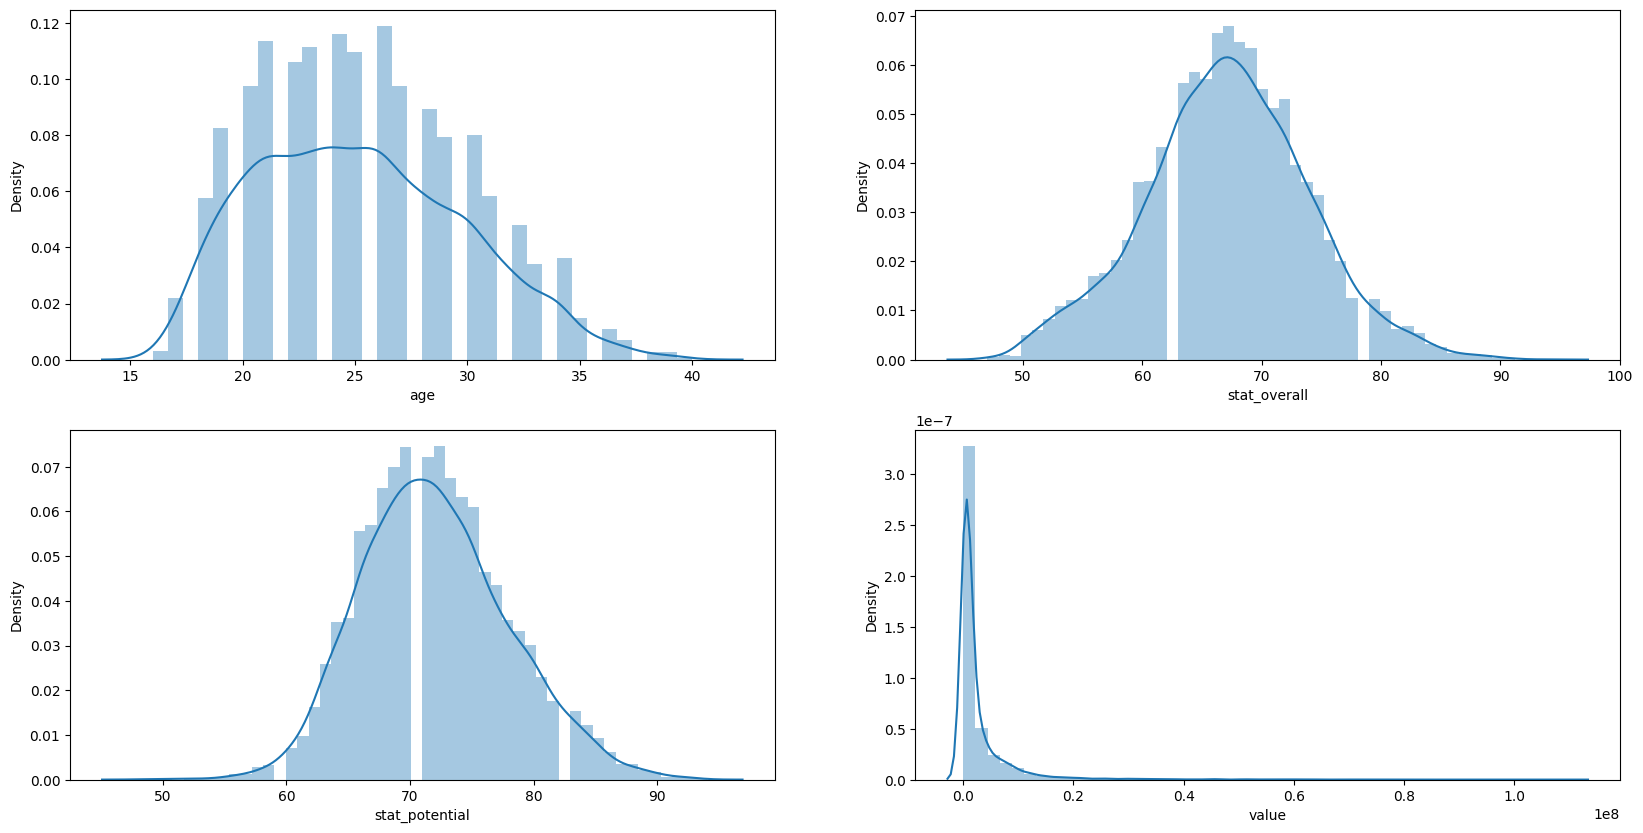

In [21]:
# distplot을 이용해 정규분포 확인
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
sns.distplot(train['age'],ax=axes[0,0])
sns.distplot(train['stat_overall'], ax=axes[0,1])
sns.distplot(train['stat_potential'],ax=axes[1,0])
sns.distplot(train['value'],ax=axes[1,1]);

In [6]:
train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...
8927,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


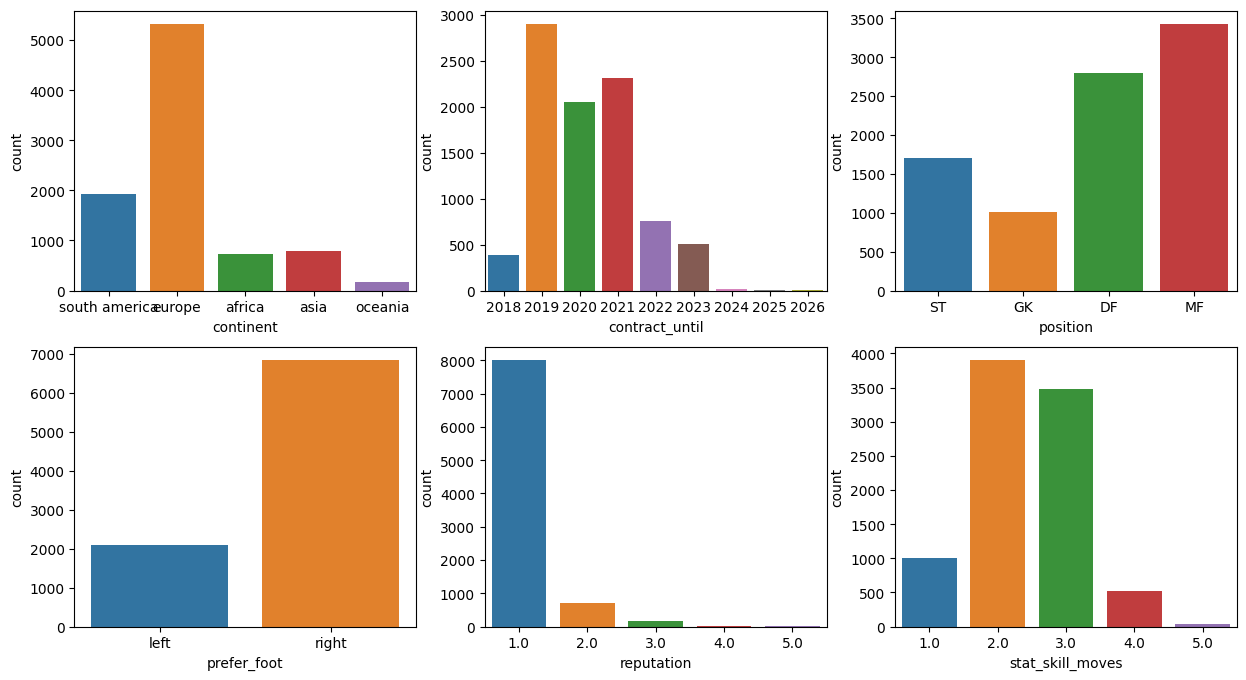

In [22]:
# 범주형 데이터 확인
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
plt.figsize = (15, 8)
sns.countplot(data=train, x='continent', ax=axes[0,0])
sns.countplot(data=train, x='contract_until', ax=axes[0,1])
sns.countplot(data=train, x='position', ax=axes[0,2])
sns.countplot(data=train, x='prefer_foot', ax=axes[1,0])
sns.countplot(data=train, x='reputation', ax=axes[1,1])
sns.countplot(data=train, x='stat_skill_moves', ax=axes[1,2]);

C:\Users\82104\AppData\Local\Temp\ipykernel_1596\171932878.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()
C:\Users\82104\AppData\Local\Temp\ipykernel_1596\171932878.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot: >

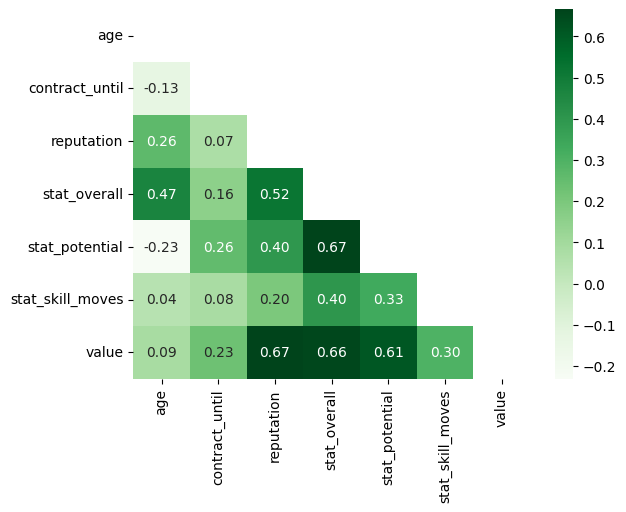

In [23]:
# 상관계수 확인하기
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=corr, cmap='Greens', annot=True, mask=mask, fmt='.2f')

## 추가 전처리

In [24]:
train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...
8927,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [25]:
train_ohe = pd.get_dummies(train[['continent','position','prefer_foot']])
train_ohe

,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,0,0,0,0,1,0,0,0,1,1,0
1,0,0,1,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8927,1,0,0,0,0,0,0,1,0,0,1
8928,0,0,1,0,0,1,0,0,0,0,1
8929,0,0,0,0,1,1,0,0,0,0,1
8930,0,0,1,0,0,0,1,0,0,0,1


In [26]:
train_con = pd.concat([train,train_ohe], axis=1)
train_con

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,...,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,...,0,0,0,1,0,0,0,1,1,0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,...,0,1,0,0,0,1,0,0,0,1
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,...,0,0,0,1,0,0,0,1,0,1
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,...,0,1,0,0,1,0,0,0,0,1
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0,...,0,0,0,0,0,0,1,0,0,1
8928,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0,...,0,1,0,0,1,0,0,0,0,1
8929,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0,...,0,0,0,1,1,0,0,0,0,1
8930,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0,...,0,1,0,0,0,1,0,0,0,1


In [32]:
test_ohe = pd.get_dummies(test[['continent','position','prefer_foot']])
test_ohe

,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,0,0,1,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,1,0,1
2,0,0,1,0,0,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,1,0,1
4,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3823,0,1,0,0,0,0,0,1,0,0,1
3824,0,0,1,0,0,0,1,0,0,0,1
3825,0,0,0,0,1,0,0,1,0,0,1
3826,0,0,1,0,0,0,0,0,1,0,1


In [33]:
test_con = pd.concat([test,test_ohe], axis=1)
test_con

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,33,europe,2022,ST,right,5.0,94,94,5.0,0,0,1,0,0,0,0,0,1,0,1
1,26,south america,2022,ST,right,5.0,92,93,5.0,0,0,0,0,1,0,0,0,1,0,1
2,27,europe,2023,MF,right,4.0,91,92,4.0,0,0,1,0,0,0,0,1,0,0,1
3,27,europe,2020,ST,right,4.0,91,91,4.0,0,0,1,0,0,0,0,0,1,0,1
4,32,europe,2020,MF,right,4.0,91,91,4.0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,20,asia,2021,MF,right,1.0,48,63,2.0,0,1,0,0,0,0,0,1,0,0,1
3824,18,europe,2018,GK,right,1.0,48,65,1.0,0,0,1,0,0,0,1,0,0,0,1
3825,18,south america,2021,MF,right,1.0,48,65,2.0,0,0,0,0,1,0,0,1,0,0,1
3826,18,europe,2020,ST,right,1.0,47,61,2.0,0,0,1,0,0,0,0,0,1,0,1


In [15]:
train_con.columns

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value', 'continent_africa', 'continent_asia', 'continent_europe',
       'continent_oceania', 'continent_south america', 'position_DF',
       'position_GK', 'position_MF', 'position_ST', 'prefer_foot_left',
       'prefer_foot_right'],
      dtype='object')

In [43]:
feature_names = ['age', 'contract_until',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'continent_africa', 'continent_asia', 'continent_europe',
       'continent_oceania', 'continent_south america', 'position_DF',
       'position_GK', 'position_MF', 'position_ST', 'prefer_foot_left',
       'prefer_foot_right']

In [44]:
label_name = 'value'

## 데이터셋 만들기

In [28]:
train.index,test.index

(RangeIndex(start=0, stop=8932, step=1),
 RangeIndex(start=0, stop=3828, step=1))

In [45]:
X_train = train_con[feature_names]
print(X_train.shape)

(8932, 17)


In [46]:
X_test = test_con[feature_names]
print(X_test.shape)

(3828, 17)


In [47]:
y_train = train_con[label_name]
print(y_train.shape)

(8932,)


## 머신러닝 모델

### RandomForestRegressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

In [48]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [49]:
from sklearn.model_selection import cross_val_predict

y_valid_pred = cross_val_predict(model, X_train , y_train , cv=5, n_jobs=-1, verbose=2)
y_valid_pred[:10]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished


array([5201000., 4795000., 5048000., 4831000., 5426000., 4626000.,
       5001000., 4907000., 5400000., 5400000.])

In [51]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train,y_valid_pred)
mse

25034926130387.15

In [54]:
rmse = np.sqrt(mse)
rmse

5003491.39405547

In [57]:
y_predict = model.predict(X_test)
y_predict.shape

(3828,)

<AxesSubplot: >

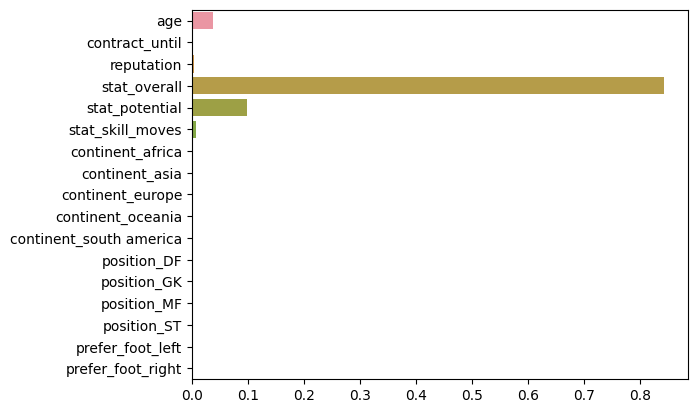

In [80]:
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

## 제출하기

In [55]:
sub = pd.read_csv('data/fifa/submission.csv')
sub.head()


,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0


In [59]:
sub['value'] = y_predict

In [60]:
sub

,id,value
0,1,76790000.0
1,2,76580000.0
2,4,68260000.0
3,5,71725000.0
4,6,61705000.0
...,...,...
3823,16924,59700.0
3824,16929,50400.0
3825,16932,59500.0
3826,16937,43500.0


In [63]:
file_name = f"data/fifa/sub_rf{rmse:.0f}.csv"

In [64]:
sub.to_csv(file_name,index=False)

### XGBoost

In [65]:
import xgboost as xgb

In [66]:
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=-1)
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [70]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": np.random.randint(15, 30, 10), 
                       "max_features": np.random.uniform(0.8, 1, 10)}

reg = RandomizedSearchCV(xgb_model, 
                   param_distributions= param_distributions,
                   scoring= 'neg_root_mean_squared_error', 
                   n_iter=10, cv=5, n_jobs=-1,
                   verbose=2, random_state=42,)

reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[20:02:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.1, ma...
                                          n_estimators=200, n_jobs=-1,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([18, 28, 24, 24, 16, 23, 22, 16, 22, 24]),
                                        'max_features': array([0.98218863, 0.96637461, 0.91974021, 0.88431557, 0.90558317,
       0.97703177, 0.93368824, 0.97361871, 0.81457064, 0.86899531])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [72]:
best_model = reg.best_estimator_
best_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=18, max_features=0.982188634581415, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=-1, num_parallel_tree=1, predictor='auto', ...)

In [74]:
rmse_xgb = abs(reg.best_score_)
rmse_xgb

2460981.528533785

In [79]:
y_xgb_predict = best_model.predict(X_test)
y_xgb_predict

array([7.8000448e+07, 8.1939928e+07, 7.5511448e+07, ..., 5.8686492e+04,
       4.8524914e+04, 4.8231746e+04], dtype=float32)

<AxesSubplot: >

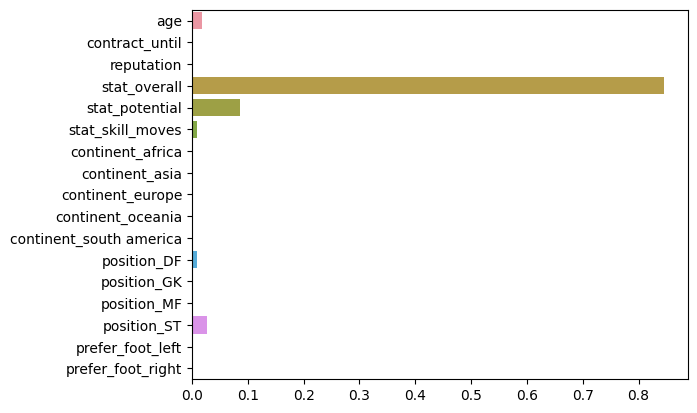

In [81]:
sns.barplot(x=best_model.feature_importances_, y=best_model.feature_names_in_)

## 제출하기

In [85]:
sub['value'] = y_xgb_predict

In [86]:
sub

,id,value
0,1,7.800045e+07
1,2,8.193993e+07
2,4,7.551145e+07
3,5,7.844046e+07
4,6,6.013658e+07
...,...,...
3823,16924,5.946986e+04
3824,16929,5.117367e+04
3825,16932,5.868649e+04
3826,16937,4.852491e+04


In [90]:
file_name_xgb = f"data/fifa/sub_xgb{rmse_xgb:.0f}.csv" 
file_name_xgb

'data/fifa/sub_xgb2460982.csv'

In [91]:
sub.to_csv(file_name_xgb,index=False)

### GradientBoostingRegressor

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
gbt_model = GradientBoostingRegressor(random_state=42, n_estimators=200, criterion='mse', learning_rate=0.2, max_depth=6, max_features=0.8)
gbt_model

GradientBoostingRegressor(criterion='mse', learning_rate=0.2, max_depth=6,
                          max_features=0.8, n_estimators=200, random_state=42)

In [94]:
param_distributions = {"max_depth": np.random.randint(15, 30, 10), 
                       "max_features": np.random.uniform(0.8, 1, 10)}

reg = RandomizedSearchCV(gbt_model, 
                   param_distributions= param_distributions,
                   scoring= 'neg_root_mean_squared_error', 
                   n_iter=10, cv=5, n_jobs=-1,
                   verbose=2, random_state=42,)

reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Python310\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 an

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(criterion='mse',
                                                       learning_rate=0.2,
                                                       max_depth=6,
                                                       max_features=0.8,
                                                       n_estimators=200,
                                                       random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([15, 27, 15, 21, 23, 16, 29, 19, 26, 25]),
                                        'max_features': array([0.99849101, 0.87306011, 0.87565411, 0.99052786, 0.95907096,
       0.95837825, 0.9998305 , 0.80422434, 0.84940284, 0.93933167])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [96]:
best_model=reg.best_estimator_
best_model

GradientBoostingRegressor(criterion='mse', learning_rate=0.2, max_depth=23,
                          max_features=0.958378254670537, n_estimators=200,
                          random_state=42)

In [97]:
best_model.fit(X_train,y_train)

c:\Python310\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 an

GradientBoostingRegressor(criterion='mse', learning_rate=0.2, max_depth=23,
                          max_features=0.958378254670537, n_estimators=200,
                          random_state=42)

In [105]:
rmse_gbt = abs(reg.best_score_)
rmse_gbt

2433228.3867135076

In [100]:
y_gbt_predict = best_model.predict(X_test)
y_gbt_predict

array([3.27684573e+07, 7.68219001e+07, 7.34363067e+07, ...,
       5.98583600e+04, 4.01697888e+04, 5.90052124e+04])

## 제출하기

In [102]:
sub['value'] = y_gbt_predict

In [107]:
file_name_gbt = f'data/fifa/sub_gbt{rmse:.0f}.csv'
file_name_gbt

'data/fifa/sub_gbt2433228.csv'

In [108]:
sub.to_csv(file_name_gbt, index=False)